# Знакомство с FastAPI

API (Application Programming Interface) — язык, на котором приложения общаются между собой. С помощью API одно приложение может использовать возможности другого приложения. Например, интернет-магазин может вызывать банковские сервисы для оплаты покупок.

## Rest API

REST (REpresentational State Transfer) — это способ создания API с помощью протокола HTTP.  
Отличительной особенностью сервисов REST является то, что они позволяют наилучшим образом использовать протокол HTTP

### Как работает HTTP

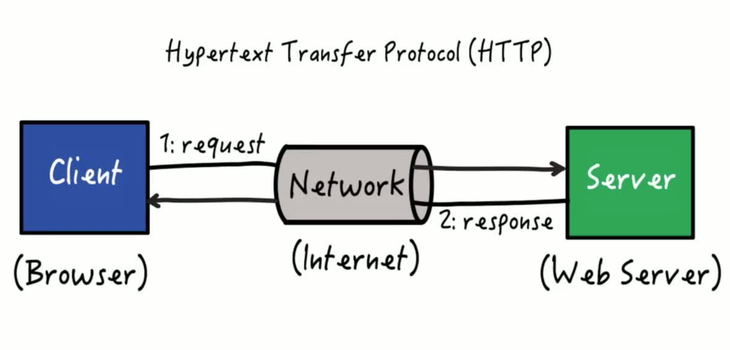

1. Браузер пользователя устанавливает соединение с сервером и отправляет следующий запрос

2. Сервер принимает запрос и отправляет ответ

3. Браузер принимает ответ и показывает готовую страницу

### Принципы REST

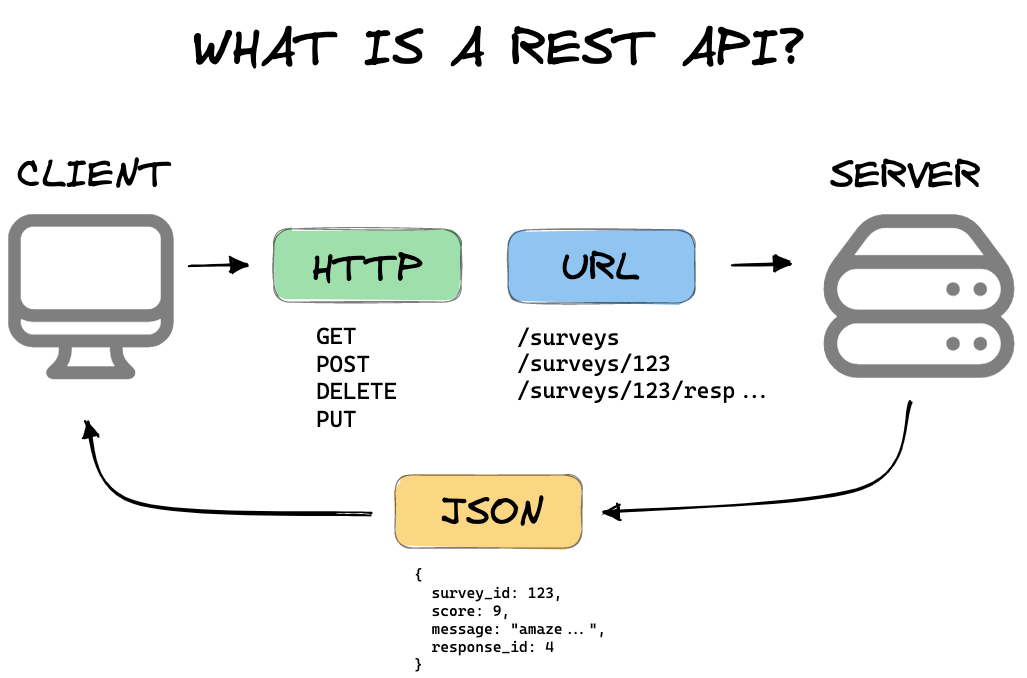

### Принципы (или "ограничения")



*   Отделение клиента от сервера (Client-Server)
*   Отсутствие записи состояния клиента (Stateless)
*   Кэшируемость (Casheable)
*   Единообразие интерфейса Rest (Uniform Interface)
*   Многоуровневость системы (Layered System)
*   Предоставление кода по запросу (Code on Demand)



### Методы

Как правило, для взаимодействия между клиентом и сервером используют следующие методы

* `GET` — получение информации об объекте (ресурсе)
* `POST` — создание нового объекта (ресурса)
* `PUT` — полная замена объекта (ресурса) на обновленную версию
* `PATCH` — частичное изменение объекта (ресурса)
* `DELETE` — удаление информации об объекте (ресурсе)


### Структура запроса

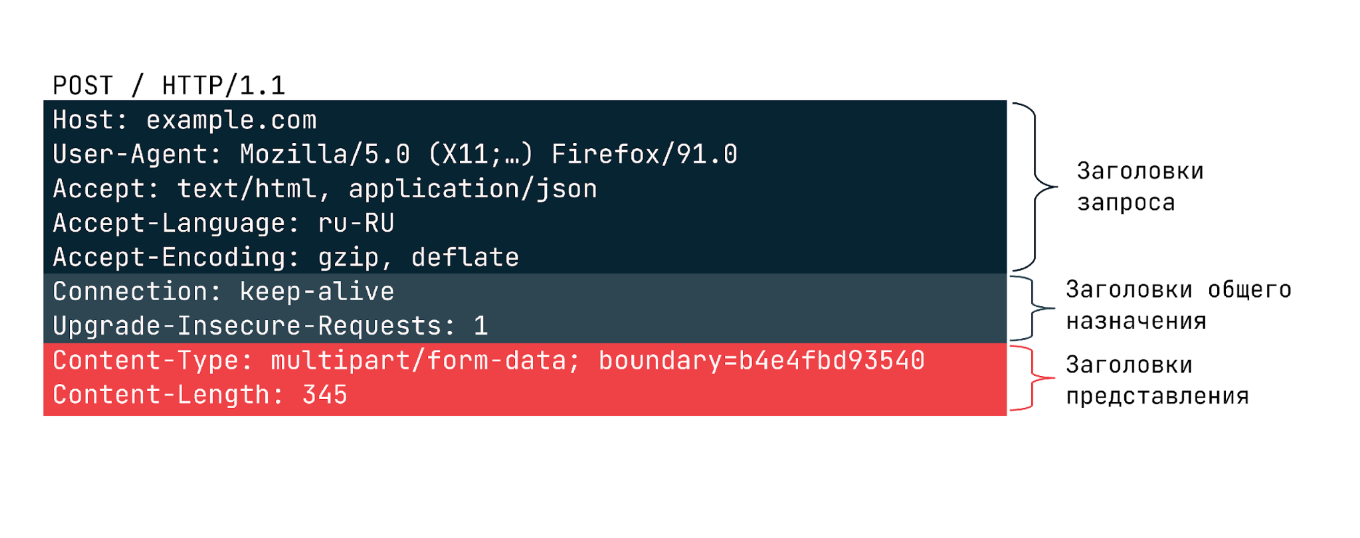

### Структура ответа

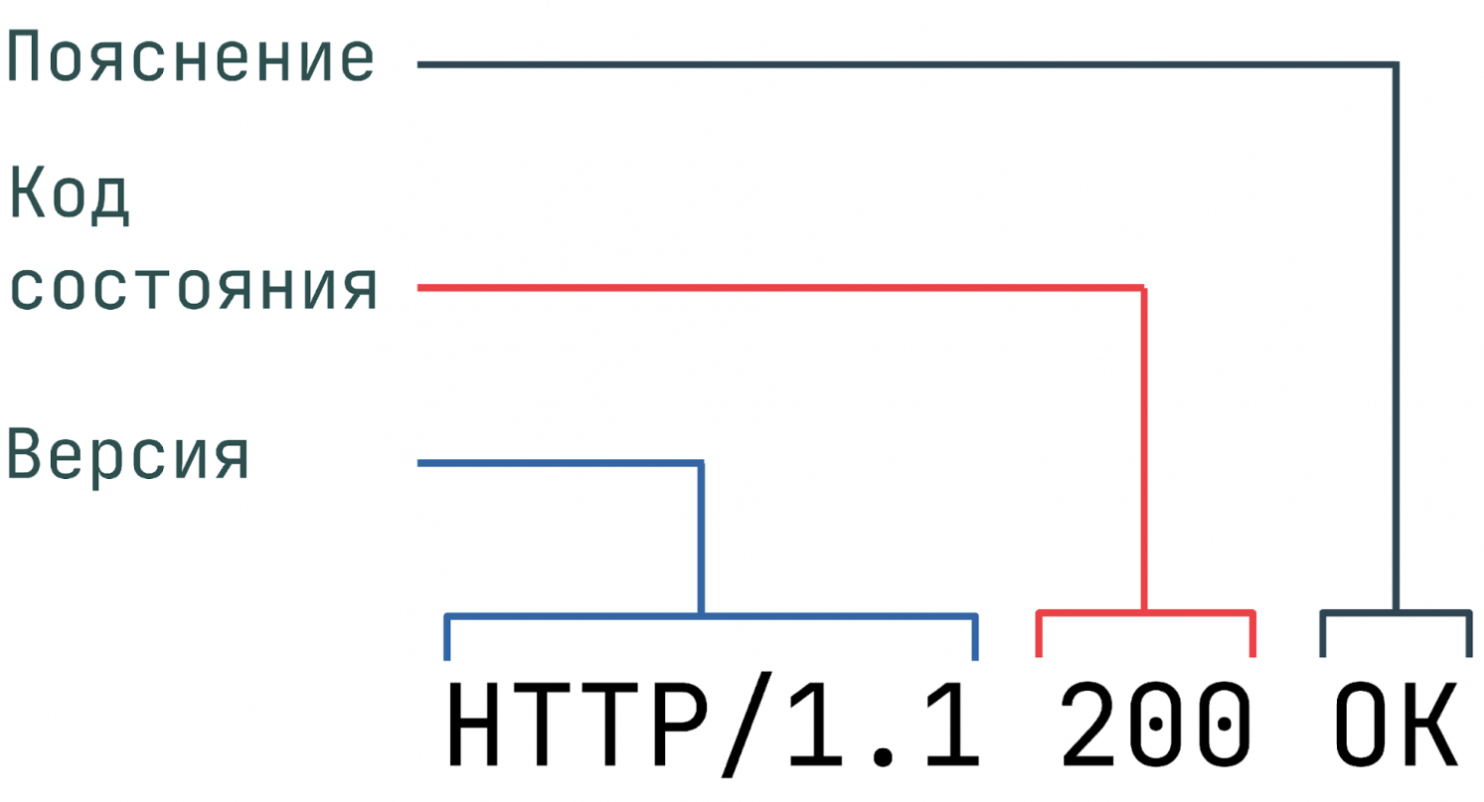

### Примеры



*   [httpbin.org](https://httpbin.org/)
*   [petstore.swagger.io](https://petstore.swagger.io/)



Итак, REST API (Representational State Transfer) – это архитектурный стиль взаимодействия компонентов распределенной системы, который используют для передачи данных между сервером и клиентом. Он работает с ресурсами через стандартные операции (GET, POST, PUT, DELETE) и использует HTTP протокол. REST API позволяет разработчикам создавать веб-сервисы для обмена данными между приложениями.

## Фреймворк FastAPI

**FastAPI** — это фреймворк (с технической точки зрения это библиотека) на языке Python, который помогает нам быстро и красиво реализовывать необходимый API

### Плюсы FastAPI

* Асинхронность
* Типизированность
* Встроенная документация (Swagger)
* Применение websockets

### Когда использовать

* Когда в вашем проекте нужна производительность
* Когда в вашем проекте нужна асинхронность
* Когда в вашем проекте нужны websockets

### Три составляющих FastAPI


* Starlette
* Uvicorn
* Pydantic

## Асинхронность

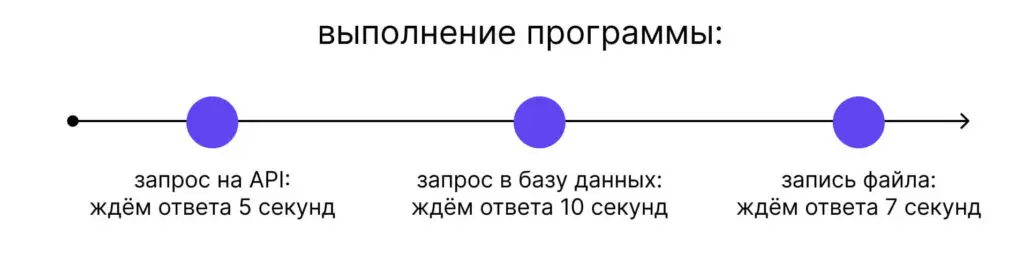

### CPU-bound / IO-bound операции

 Если скорость выполнения задачи зависит от мощности процессора — это CPU-bound-операция:
* потоковое видео
* рендеринг графики в играх
* сложные математические вычисления
* обучение ML-модели

Если скорость выполнения задачи зависит от какой-то подсистемы, задача называется IO-bound-операцией:
* скорость запроса на сайт зависит от API сайта
* скорость запроса в базу данных зависит от базы
* скорость записи файла на USB зависит от USB

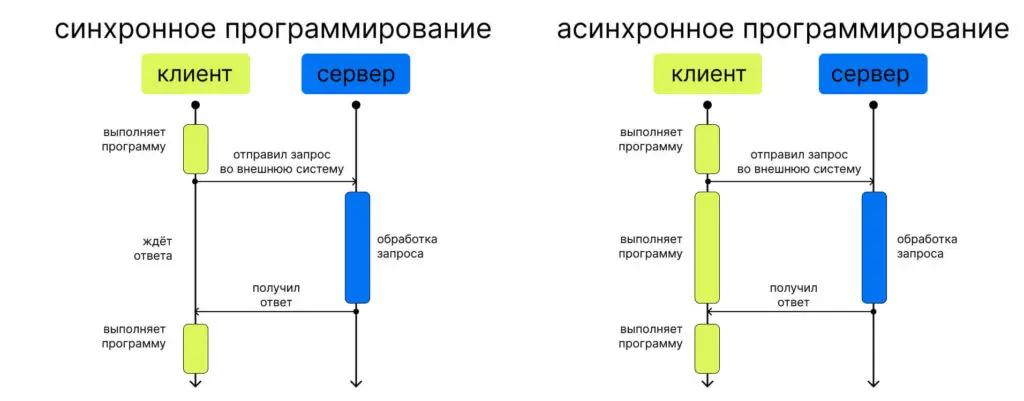

### Модуль asyncio

`asyncio` – библиотека, которая предоставляет инфраструктуру для написания параллельного кода с использованием концепции асинхронного программирования. Она позволяет эффективно обрабатывать многочисленные задачи ввода-вывода (например, сетевые операции или чтение/запись из файлов) без необходимости создавать множество потоков или процессов.

In [ ]:
import asyncio

In [ ]:
# для Google Colab
import nest_asyncio
nest_asyncio.apply()

In [ ]:
def func():
   print('Cинхронная функция')

async def async_func():
   print('Асинхронная функция')

In [ ]:
async_func()

<coroutine object async_func at 0x782f658be880>

In [ ]:
# функция для демонстрации ожидания io операции
async def io_simulate(delay):

   # в реальной жизни код ниже ожидает выполнения операции
   # на внешней системе, например ответа от сервера
   await asyncio.sleep(delay)

   # после этого функция возвращает какие-то данные,
   # которые может получить другая функция
   print('Что-то значимое!')

In [ ]:
asyncio.run(io_simulate(2))

Что-то значимое!


#### Основные понятия

**Событийный цикл (Event Loop)**

*   Это ядро `asyncio`, которое отвечает за планирование и выполнение задач (корутин)
*   Реализован на языке `C` для максимальной эффективности
*   Работает по принципу однопоточной многозадачности (single-threaded concurrency)
*   Постоянно опрашивает очередь событий и выполняет соответствующие задачи



**Корутины (Coroutines)**

*   Это специальные функции, выполнение которых можно приостанавливать на определенных точках с помощью ключевого слова `await`
*   Используются для написания асинхронного, событийно-ориентированного кода
*   Могут ждать асинхронные события (ввод-вывод, сигналы или другие корутины)
*   Определяются с помощью `async def`


**Задачи (Tasks)**

*   Представляют собой обертки над корутинами для их планирования и выполнения
*   Создаются с помощью `asyncio.create_task(coroutine)` или `asyncio.ensure_future(coroutine)`
*   Задачи можно отменять, объединять с другими задачами и отслеживать на предмет исключений
*   Задачи добавляются в событийный цикл и выполняются в порядке их готовности

**Будущие объекты (Futures)**

*  Представляют результат асинхронной операции, который может быть доступен позже
*  Задачи наследуются от класса `Future` и добавляют собственные методы управления
*  Могут быть использованы для координации между разными частями программы

**Транспорты и протоколы**

*  **Транспорты** (sockets) отвечают за передачу данных по сети
*  **Протоколы** определяют, как интерпретировать эти данные (HTTP, WebSocket и др.)
*  `asyncio` предоставляет высокоуровневые абстракции для работы с транспортами и протоколами

**Другие инструменты**

*  Пулы для управления ограниченными ресурсами (потоки, подпроцессы)
*  Синхронизаторы для координации между корутинами (**Lock**, **Event**, **Condition**)
*  Очереди для безопасной передачи данных между корутинами
*  Сигналы для обработки внешних событий (UNIX-сигналы)

#### Принцип работы

*  Создается событийный цикл, который будет управлять выполнением задач
*  Определяются корутины, которые выполняют некоторую работу и могут приостанавливаться на операциях ввода-вывода с помощью ключевого слова `await`
*  Корутины оборачиваются в задачи с помощью функции `asyncio.create_task()`
*  Задачи планируются для выполнения в событийном цикле с помощью функции `asyncio.run()` или добавляются в цикл вручную
*  Событийный цикл начинает выполнять задачи по очереди. Когда задача достигает операции ввода-вывода (например, `await asyncio.sleep()`), она приостанавливается, и событийный цикл переключается на другую задачу
*  Когда операция ввода-вывода завершается, задача возобновляется и продолжает выполнение до следующей операции ввода-вывода или завершения

#### Основные и дополнительные корутины

In [ ]:
# создаём корутину, которая имитирует IO-операцию
async def fetch_data(wait_time):
   print('Корутина с IO-операцией начала работу')

   # asyncio.sleep имитирует асинхронное ожидание на внешней системе,
   # мы можем ждать сразу несколько таких операций параллельно
   await asyncio.sleep(wait_time)

   # отчитываемся о результате
   print('Данные загружены из внешней системы загружены')

   # отдаём результат запроса дальше в программу
   return {'Данные': 'Полученные данные из единственной корутины без номера'}

In [ ]:
# создаём корутину с основной логикой
async def main():
   print('*Запущена основная корутина*\n')

   # запускаем корутину с IO-операцией
   task = fetch_data(3)

   # на этом месте выполнение будет приостановлено, пока не будет выполнена функция fetch_data
   result = await task

   # смотрим, какой результат вернула корутина с IO-операцией
   print('Полученный результат: ', result)
   print('\n*Основная корутина закончила работать*')

In [ ]:
# запускаем код
asyncio.run(main())

*Запущена основная корутина*

Корутина с IO-операцией начала работу
Данные загружены из внешней системы загружены
Полученный результат:  {'Данные': 'Полученные данные из единственной корутины без номера'}

*Основная корутина закончила работать*


#### Порядок выполнения

In [ ]:
# создаём корутину с основной логикой
async def main():
   print('*Запущена основная корутина*\n')

   # запускаем корутину с IO-операцией
   task = fetch_data(3)
   print('\n*Основная корутина закончила работать*')

   # на этом месте выполнение будет приостановлено, пока не будет выполнена функция fetch_data
   result = await task

   # смотрим, какой результат вернула корутина с IO-операцией
   print('Полученный результат: ', result)

In [ ]:
# запускаем код
asyncio.run(main())

*Запущена основная корутина*


*Основная корутина закончила работать*
Корутина с IO-операцией начала работу
Данные загружены из внешней системы загружены
Полученный результат:  {'Данные': 'Полученные данные из единственной корутины без номера'}


#### Синхронный код?


In [ ]:
# создаём корутину, которая симулирует IO операцию
async def fetch_data(id, wait_time):
   print(f'\nКорутина с IO-операцией {id} начала работу')

   # asyncio.sleep имитирует асинхронное ожидание на внешней системе,
   # мы можем ждать сразу несколько таких операций параллельно
   await asyncio.sleep(wait_time)

   # отчитываемся о завершении работы и возвращаем данные в виде строки
   print(f'Данные из корутины {id} загружены')
   return f'Данные, которые возвращает корутина {id}'

In [ ]:
# создаём корутину с основной логикой
async def main():
   # создаём два объекта одной и той корутины
   task1 = fetch_data(1, 2)
   task2 = fetch_data(2, 2)

   # создаём переменную, которая запустит корутину через слово await
   result1 = await task1

   # смотрим, что получили из первой корутины
   print('Полученный результат result1: ', result1)

   # создаём переменную, которая запустит следующую корутину через слово await
   result2 = await task2

   # смотрим, что получили из второй корутины
   print('Полученный результат result2: ', result2)

In [ ]:
# запускаем код
asyncio.run(main())


Корутина с IO-операцией 1 начала работу
Данные из корутины 1 загружены
Полученный результат result1:  Данные, которые возвращает корутина 1

Корутина с IO-операцией 2 начала работу
Данные из корутины 2 загружены
Полученный результат result2:  Данные, которые возвращает корутина 2


#### `create_task()`

Создаём отдельные асинхронные задачи через `create_task`

In [ ]:
# создаём корутину с основной логикой
async def main():

   # создаём 3 задачи, используя create_task и корутину с IO-операцией
   task1 = asyncio.create_task(fetch_data(1, 3))
   task2 = asyncio.create_task(fetch_data(2, 3))
   task3 = asyncio.create_task(fetch_data(3, 3))

   # запускаем все три задачи
   result1 = await task1
   result2 = await task2
   result3 = await task3

   # смотрим на результат, который возвращает каждая из задач
   print(result1)
   print(result2)
   print(result3)

In [ ]:
# запускаем код
asyncio.run(main())


Корутина с IO-операцией 1 начала работу

Корутина с IO-операцией 2 начала работу

Корутина с IO-операцией 3 начала работу
Данные из корутины 1 загружены
Данные из корутины 2 загружены
Данные из корутины 3 загружены
Данные, которые возвращает корутина 1
Данные, которые возвращает корутина 2
Данные, которые возвращает корутина 3


#### `gather()`

Запускаем несколько корутин из одного места

In [ ]:
# создаём корутину с основной логикой
async def main():
   # запускаем все три корутины одновременно и ждём их выполнения параллельно
   results = await asyncio.gather(fetch_data(1, 3),
                                  fetch_data(2, 3),
                                  fetch_data(3, 3))

   # смотрим на результат и скорость его появления
   for result in results:
       print(result)

In [ ]:
# запускаем код
asyncio.run(main())


Корутина с IO-операцией 1 начала работу

Корутина с IO-операцией 2 начала работу

Корутина с IO-операцией 3 начала работу
Данные из корутины 1 загружены
Данные из корутины 2 загружены
Данные из корутины 3 загружены
Данные, которые возвращает корутина 1
Данные, которые возвращает корутина 2
Данные, которые возвращает корутина 3


У `gather` есть минус — он не обрабатывает ошибки в отдельных корутинах. Если в одной из функций что-то не сработает, код продолжит выполнение. Если асинхронные функции для обработки IO-операций связаны, то итогом может быть какой-то баг, причина которого потеряется в общем списке `gather`.

#### Резюме

Асинхронное программирование делает программу лучше при двух условиях:

*  Сервис использует в работе операции на других системах: делает запросы на другие сайты, базы данных, API. Такие задачи называются IO-bound-операции
*  Приложение достаточно большое, такие задачи запускаются часто


Если выполнять IO-bound-операции часто и синхронно, всё будет работать очень медленно. Например, посетители сайта будут обслуживаться по очереди, как у реального живого продавца. Асинхронное программирование позволит не ждать выполнения каждой функции, а заняться пока запросами к базе данных и перейти к следующему пользователю.

## Установка

Установка FastAPI в виртуальное окружение

In [ ]:
# создаем папку для проекта
!mkdir fastapi_hello_world

# переходим в папку проекта
!cd fastapi_hello_world

# создаем виртуальное окружение
!python3 -m venv .venv

# активируем виртуальное окружение
!source .venv/bin/activate

# ставим модуль `FastAPI`
!python3 -m pip install -U fastapi

# ставим сервер ASGI (uvicorn)
!python3 -m pip install "uvicorn[standard]"

Или установить FastAPI и Uvicorn одной командой

In [ ]:
!python3 -m pip install "fastapi[all]"

## Hello World

In [ ]:
# main.py

from fastapi import FastAPI

app = FastAPI()


@app.get("/")
async def root():
    return {"message": "Привет, мир"}

In [ ]:
!uvicorn main:app --reload --port 8000

In [ ]:
# main.py

from fastapi import FastAPI

app = FastAPI()


@app.get("/")
async def root():
    return {"message": "Привет, мир"}

if __name__ == "__main__":
    uvicorn.run("main:app", host="127.0.0.1", port=8000, reload=True)

## Запуск FastAPI в Google Colab

In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI()


@app.get("/")
async def root():
    return {"message": "Привет, мир"}

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

35.186.177.28INFO:     Started server process [55029]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
your url is: https://fastapi.loca.lt
INFO:     146.70.81.235:0 - "GET / HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET / HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [55029]


## Автоматическая документация

* OpenAPI  
http://127.0.0.1:8000/openapi.json

* Swagger UI  
http://127.0.0.1:8000/docs/

* Redoc  
http://127.0.0.1:8000/redoc

In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI(
    docs_url=None,
    redoc_url=None,
)


@app.get("/")
async def root():
    return {"message": "Привет, мир"}

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

## Маршрутизация

### Path-параметры

Path - это часть URL, после первого символа `/`, следующего за именем домена. Термин `path` также часто называется `endpoint` или `route`

In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI()


@app.get("/")
async def welcome() -> dict:
    return {"message": "Привет, мир"}


# Путь `path` задается декоратором с соответствующей операцией
# В данном случае операция GET
@app.get("/hello/{user}")
async def welcome_user(user: str) -> dict:
    return {"user": f'Привет, {user}'}


# несколько `path`-параметров в URL-адресе
@app.get("/hello/{name}/{second_name}/{age}")
async def welcome_user(name: str, second_name: str, age: float) -> dict:
    return {"user": f'Привет, {name}, {second_name}'}

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

35.186.177.28INFO:     Started server process [56883]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
your url is: https://fastapi.loca.lt
INFO:     146.70.81.235:0 - "GET / HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /hello/Elena/Beaty/99 HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /hello/Elena/Beaty/age HTTP/1.1" 422 Unprocessable Entity
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [56883]


In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI()


@app.get("/user/{user_name}")
async def user(user_name: str) -> dict:
    return {"user": user_name}


@app.get("/user/profile")
async def profile() -> dict:
    return {"profile": "View profile user"}

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

35.186.177.28INFO:     Started server process [57862]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
your url is: https://fastapi.loca.lt
INFO:     146.70.81.235:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /user/profile HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [57862]


In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI()


@app.get("/user/profile")
async def profile() -> dict:
    return {"profile": "View profile user"}


@app.get("/user/{user_name}")
async def user(user_name: str) -> dict:
    return {"user": user_name}

In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

### Query-параметры

Параметр запроса — это пара ключ-значение, предоставляемая после окончания URL- адреса конечной точки, обозначенного вопросительным знаком (`?`).  

Как и параметр пути, он также содержит данные запроса. Служба API может управлять рядом параметров запроса, разделенных амперсандом (`&`).

Когда объявляются аргументы функции-обработчика запроса, которые не являются параметрами пути path, то они автоматически интерпретируются как "query"-параметры.

In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI()


@app.get("/user")
async def login(username: str, age: int) -> dict:
    return {"user": username, "age": age}

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

INFO:     Started server process [58493]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
your url is: https://fastapi.loca.lt
35.186.177.28INFO:     146.70.81.235:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /user?username=Elena&age=99 HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [58493]


### Комбинация параметров пути и параметров запроса

In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI()


@app.get("/employee/{name}/company/{company}")
async def get_employee(name: str, department: str, company: str) -> dict:
    return {"Employee": name, "Company": company, "Department": department}

In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

## Параметры по умолчанию

In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI()


@app.get("/user")
async def login(username: str, age: int = 99) -> dict:
    return {"user": username, "age": age}

In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

In [ ]:
%%writefile main.py

from fastapi import FastAPI

app = FastAPI()


@app.get("/user")
async def login(username: str, age: int | None = None) -> dict:
    return {"user": username, "age": age}

In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

## Валидация параметров

Через конструктор `Path` можно установить следующие параметры для валидации значений:

*  `title`
*  `description`
*  `example`
*  `include_in_schema`

...и задать правила валидации:

*  `min_length` — устанавливает минимальное количество символов в значении параметра
*  `max_length` — устанавливает максимальное количество символов в значении параметра
*  `regex` — устанавливает регулярное выражение, которому должно соответствовать значение параметра
*  `lt` — значение параметра должно быть меньше определенного значения
*  `le` — значение параметра должно быть меньше или равно определенному значению
*  `gt` — значение параметра должно быть больше определенного значения
*  `ge` — значение параметра должно быть больше или равно определенному значению



In [ ]:
%%writefile main.py

from fastapi import FastAPI, Path

app = FastAPI()


@app.get("/user/{username}/{age}")
async def login(
    username: str = Path(min_length=3,
                         max_length=15,
                         description='Enter your username',
                         example='Elena'
                         ),
                age: int = Path(ge=0, le=100, description="Enter your age")) -> dict:
    return {"user": username, "age": age}

Overwriting main.py


In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

35.186.177.28INFO:     Started server process [59644]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
your url is: https://fastapi.loca.lt
INFO:     146.70.81.235:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     146.70.81.235:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [59644]


Порядок параметров важен?

In [ ]:
%%writefile main.py

from fastapi import FastAPI, Path

app = FastAPI()


@app.get("/user/{username}")
async def login(username: str = Path(
                min_length=3,
                max_length=15,
                description='Enter your username',
                example='Elena'
                ),
                age: int) -> dict:

    return {"user": username, "age": age}

In [ ]:
%%writefile main.py

from typing import Annotated
from fastapi import FastAPI, Path

app = FastAPI()


@app.get("/user/{username}")
async def login(
        username: Annotated[str, Path(
            min_length=3,
            max_length=15,
            description='Enter your username',
            example='Elena'
            )],
        age: int) -> dict:

    return {"user": username, "age": age}

In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

FastAPI позволяет определять дополнительную информацию (метаданные) и валидацию для query-параметров запроса. Для достижения этих целей фреймворк FastAPI использует `typing.Annotated` как подсказку типа для query-параметрa

In [ ]:
%%writefile main.py

from typing import Annotated
from fastapi import FastAPI, Path, Query

app = FastAPI()


@app.get("/user/{username}")
async def login(
        username: Annotated[str, Path(
            min_length=3,
            max_length=15,
            description='Enter your username',
            example='Elena')
        ],
        first_name: Annotated[str | None, Query(
            max_length=10
            )] = None) -> dict:

    return {"user": username, "Name": first_name}

In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

 Классы `Path()` и `Query()` в FastAPI позволяют определить параметр RegEx для проверки, чтобы можно было проверить строковое значение параметра пути/запроса по указанному шаблону поиска.

In [ ]:
%%writefile main.py

from typing import Annotated
from fastapi import FastAPI, Path, Query

app = FastAPI()


@app.get("/user/{username}")
async def login(
        username: Annotated[
            str, Path(
                min_length=3,
                max_length=15,
                description='Enter your username',
                example='Elena'
                )],

        first_name: Annotated[
            str | None, Query(
                max_length=10,
                regex="^E|a$"
                )] = None) -> dict:

    return {"user": username, "Name": first_name}

In [ ]:
!uvicorn main:app & npx localtunnel --port 8000 --subdomain fastapi & wget -q -O - https://loca.lt/mytunnelpassword

Дополнительную информацию про валидацию Query и Path параметров можно посмотреть в [документации](https://fastapi.tiangolo.com/ru/tutorial/query-params-str-validations/)!